In [1]:
# Import necessary libraries
from GoogleNews import GoogleNews
import pandas as pd

In [2]:
# Define the keyword to search.
keyword = 'minions'

In [3]:
# Perform news scraping from Google and extract the result into Pandas dataframe. 
googlenews = GoogleNews(lang='en', region='US', period='7d', encode='utf-8')
googlenews.clear()
googlenews.search(keyword)
googlenews.get_page(2)
news_result = googlenews.result(sort=True)
news_data_df = pd.DataFrame.from_dict(news_result)

In [4]:
# Display information of dataframe.
news_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     20 non-null     object        
 1   media     20 non-null     object        
 2   date      20 non-null     object        
 3   datetime  20 non-null     datetime64[ns]
 4   desc      20 non-null     object        
 5   link      20 non-null     object        
 6   img       20 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 1.2+ KB


In [5]:
# Display header of dataframe.
news_data_df.head()

,title,media,date,datetime,desc,link,img
0,'Gentleminions' on TikTok: Why Teens Are Weari...,CNET,0 hours ago,2022-07-10 22:25:42.559228,Tons of teenagers are descending on theaters d...,https://www.cnet.com/culture/internet/gentlemi...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Friday Box Office: 'Minions 2' Drops 70% As 'T...,Forbes,1 hours ago,2022-07-10 21:25:42.562231,'Minions: The Rise of Gru' will pass $200 mill...,https://www.forbes.com/sites/scottmendelson/20...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Danny Trejo Usually Plays Villains In Movies P...,CinemaBlend,9 hours ago,2022-07-10 13:25:42.556228,Danny Trejo is known for some pretty rough-and...,https://www.cinemablend.com/interviews/danny-t...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Minions The Rise Of Gru Quiz,BuzzFeed,1 day ago,2022-07-09 22:25:45.754541,The dress code is formal attire. Don't let Gru...,https://www.buzzfeed.com/sarahaspler/build-an-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Thor and Minions Are Blockbusters. What's Next...,Barron's,1 day ago,2022-07-09 22:25:45.729547,"It's been a summer of blockbusters, with Minio...",https://www.barrons.com/articles/thor-minions-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [6]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [7]:
# Define the service key and endpoint of Azure Text Analytics
# key = "PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_SERVICE_KEY"
# endpoint = "https://PLEASE_ENTER_YOUR_OWNED_AZURE_TEXT_ANALYTICS_INSTANCE_NAME.cognitiveservices.azure.com/"

In [8]:
# Initialize Azure Text Analytics client.
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

In [9]:
# Perform sentiment analysis of news description and extract the result into Pandas dataframe. 
news_data_sentiment = []
for index, headers in news_data_df.iterrows():
    news_title = str(headers['title'])
    news_media = str(headers['media'])
    news_update = str(headers['date'])
    news_timestamp = str(headers['datetime'])
    news_description = str(headers['desc'])
    documents = [news_description]
    response = client.analyze_sentiment(documents=documents, language="en")[0]
    sentiment = response.sentiment
    news_link = str(headers['link'])
    news_img = str(headers['img'])
    news_data_sentiment.append([news_title, news_media, news_update, news_timestamp, 
                                news_description, sentiment, news_link, news_img])

news_data_sentiment_df = pd.DataFrame(news_data_sentiment, columns=['Title', 'Media', 'Update', 'Timestamp',
                                                                    'Description', 'Sentiment', 'Link', 'Image'])

In [10]:
news_data_sentiment_df.head()

,Title,Media,Update,Timestamp,Description,Sentiment,Link,Image
0,'Gentleminions' on TikTok: Why Teens Are Weari...,CNET,0 hours ago,2022-07-10 22:25:42.559228,Tons of teenagers are descending on theaters d...,neutral,https://www.cnet.com/culture/internet/gentlemi...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Friday Box Office: 'Minions 2' Drops 70% As 'T...,Forbes,1 hours ago,2022-07-10 21:25:42.562231,'Minions: The Rise of Gru' will pass $200 mill...,neutral,https://www.forbes.com/sites/scottmendelson/20...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Danny Trejo Usually Plays Villains In Movies P...,CinemaBlend,9 hours ago,2022-07-10 13:25:42.556228,Danny Trejo is known for some pretty rough-and...,negative,https://www.cinemablend.com/interviews/danny-t...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Minions The Rise Of Gru Quiz,BuzzFeed,1 day ago,2022-07-09 22:25:45.754541,The dress code is formal attire. Don't let Gru...,negative,https://www.buzzfeed.com/sarahaspler/build-an-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Thor and Minions Are Blockbusters. What's Next...,Barron's,1 day ago,2022-07-09 22:25:45.729547,"It's been a summer of blockbusters, with Minio...",positive,https://www.barrons.com/articles/thor-minions-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [11]:
# Export dataframe to csv file.
news_data_sentiment_df.to_csv(r'.\data\news_data_sentiment_df.csv', index=False, encoding="utf-8-sig")

<AxesSubplot:ylabel='Description'>

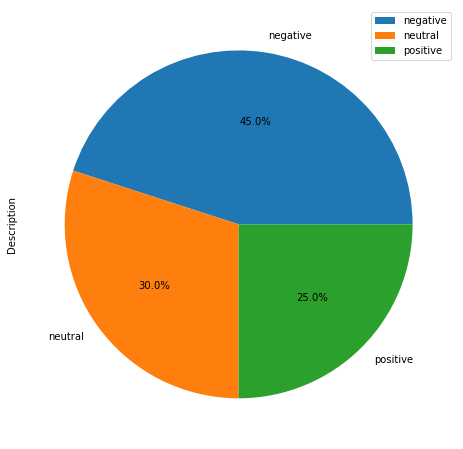

In [12]:
# Visualize news description sentiment by pie chart.
news_data_sentiment_df.groupby(['Sentiment']).count().plot(kind='pie', y='Description', figsize=(8,8), autopct='%1.1f%%')

In [13]:
news_data_sentiment_df

,Title,Media,Update,Timestamp,Description,Sentiment,Link,Image
0,'Gentleminions' on TikTok: Why Teens Are Weari...,CNET,0 hours ago,2022-07-10 22:25:42.559228,Tons of teenagers are descending on theaters d...,neutral,https://www.cnet.com/culture/internet/gentlemi...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,Friday Box Office: 'Minions 2' Drops 70% As 'T...,Forbes,1 hours ago,2022-07-10 21:25:42.562231,'Minions: The Rise of Gru' will pass $200 mill...,neutral,https://www.forbes.com/sites/scottmendelson/20...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,Danny Trejo Usually Plays Villains In Movies P...,CinemaBlend,9 hours ago,2022-07-10 13:25:42.556228,Danny Trejo is known for some pretty rough-and...,negative,https://www.cinemablend.com/interviews/danny-t...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,Minions The Rise Of Gru Quiz,BuzzFeed,1 day ago,2022-07-09 22:25:45.754541,The dress code is formal attire. Don't let Gru...,negative,https://www.buzzfeed.com/sarahaspler/build-an-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,Thor and Minions Are Blockbusters. What's Next...,Barron's,1 day ago,2022-07-09 22:25:45.729547,"It's been a summer of blockbusters, with Minio...",positive,https://www.barrons.com/articles/thor-minions-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,Minions: The Rise Of Gru Takes Despicable Me F...,MovieWeb,1 day ago,2022-07-09 22:25:45.704553,The latest outing for Gru and his Minions has ...,positive,https://movieweb.com/minions-the-rise-of-gru-t...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
6,Gentle Minions TikTok Trend: Why Teens are Wea...,TODAY,1 day ago,2022-07-09 22:25:45.678542,Movie theaters are experiencing the rise of Ge...,neutral,https://www.today.com/popculture/movies/gentle...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,How 'Minions' Became a Gen Z TikTok Storm,Bloomberg.com,1 day ago,2022-07-09 22:25:45.652469,A fortunate combination of intellectual proper...,positive,https://www.bloomberg.com/opinion/articles/202...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
8,#GentleMinions Has Moviegoers Dressing Up,The New York Times,1 day ago,2022-07-09 22:25:45.626469,A TikTok trend around the release of “Minions:...,neutral,https://www.nytimes.com/2022/07/08/style/minio...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,The Minions of Gru are happy clowns in an anxi...,Financial Times,1 day ago,2022-07-09 22:25:45.600470,It may be shallower than Pixar's computer anim...,positive,https://www.ft.com/content/28b0ca76-8033-4190-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [14]:
news_data_sentiment_df.loc[news_data_sentiment_df['Sentiment'] == 'positive']

,Title,Media,Update,Timestamp,Description,Sentiment,Link,Image
4,Thor and Minions Are Blockbusters. What's Next...,Barron's,1 day ago,2022-07-09 22:25:45.729547,"It's been a summer of blockbusters, with Minio...",positive,https://www.barrons.com/articles/thor-minions-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
5,Minions: The Rise Of Gru Takes Despicable Me F...,MovieWeb,1 day ago,2022-07-09 22:25:45.704553,The latest outing for Gru and his Minions has ...,positive,https://movieweb.com/minions-the-rise-of-gru-t...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
7,How 'Minions' Became a Gen Z TikTok Storm,Bloomberg.com,1 day ago,2022-07-09 22:25:45.652469,A fortunate combination of intellectual proper...,positive,https://www.bloomberg.com/opinion/articles/202...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
9,The Minions of Gru are happy clowns in an anxi...,Financial Times,1 day ago,2022-07-09 22:25:45.600470,It may be shallower than Pixar's computer anim...,positive,https://www.ft.com/content/28b0ca76-8033-4190-...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
11,That TikTok Meme Doubled the Teen Audience for...,The Wrap,1 day ago,2022-07-09 22:25:45.549545,Minions: The Rise of Gru was a big hit over th...,positive,https://www.thewrap.com/minions-rise-of-gru-te...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
